# Get an image

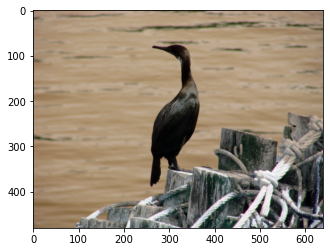

In [2]:
from matplotlib import pyplot as plt
import cv2

image_to_segment = cv2.imread("../bird_dataset/test_images/mistery_category/6e3c2c583774606210735e93fda8a521.jpg")
image_to_segment = cv2.resize(image_to_segment, [640, 480])

plt.imshow(image_to_segment)
plt.show()

# Load the neural network

In [3]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
# Load model 
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

# Evaluate the network and visualize the output

In [9]:
outputs = predictor(image_to_segment)

/workspaces/birdClassification/env_container/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


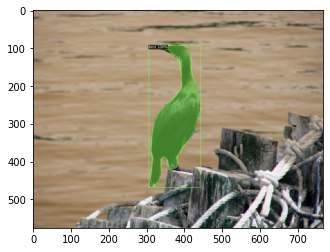

In [12]:
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer

v = Visualizer(image_to_segment[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()